[[0.47532199 0.37532199 0.28532199]
 [0.37532199 0.37532199 0.28532199]
 [0.28532199 0.28532199 0.28532199]]


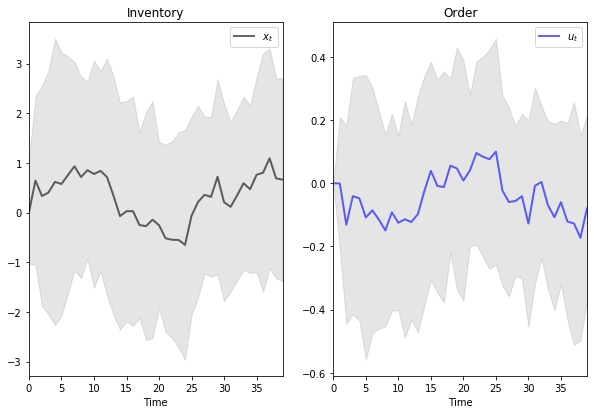

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from quantecon import LQ

sigma = 1 
rho = 0.1 
beta = 0.9  
delta = 3

A = np.diag(np.ones(delta-1), 1)
A[0,0] = 1

B = np.zeros((delta, 1))
B[-1] = 1
C = np.zeros((delta, 1))
C[0,0] = -sigma
R = np.zeros((delta, delta)) 
R[0,0] = rho
Q=1

lq = LQ(Q, R, A, B, C=C, beta=beta)
P, F, d = lq.stationary_values()

print(P)

x0 = np.zeros((delta, 1))
x0[0,0] = 0
x0[-1,0] = 0

reps = 15
t = 40

xt = np.zeros((reps, t)) 
ut = np.zeros((reps, t)) 

for i in range(reps):
    xp, up, wp = lq.compute_sequence(x0, t)
    xt[i,:] = xp[0][1:]
    ut[i,:] = up[0,:]

xt_mean = xt.mean(axis=0)
xt_std = xt.std(axis=0)
ut_mean = ut.mean(axis=0)
ut_std = ut.std(axis=0)

time = range(t)
fig, ax = plt.subplots(1,2, figsize=(10, 6.5))

ax[0].plot(time, xt_mean, 'k-', lw=2, alpha=0.6, label=r'$x_t$')
ax[0].fill_between(time, xt_mean-xt_std, xt_mean+xt_std, color='k', alpha=.1)
ax[0].set_xlabel('Time')
ax[0].set_xlim(0, max(time))
ax[0].set_title('Inventory')
ax[0].legend()

ax[1].plot(time, ut_mean, 'b-', lw=2, alpha=0.6, label=r'$u_t$')
ax[1].fill_between(time, ut_mean-ut_std, ut_mean+ut_std, color='k', alpha=.1)
ax[1].set_xlabel('Time')
ax[1].set_xlim(0, max(time))
ax[1].set_title('Order')
ax[1].legend()
                   
plt.show()
                   
                   
                   